# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

###Scraping data from Skytraxs
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import requests

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  Not Verified |  We have flown BA five times fr...
1  ✅ Trip Verified |  London Heathrow to Istanbul...
2  Not Verified | Jan 30th, I booked a last-minut...
3  ✅ Trip Verified | I am a British Airways Gold ...
4  Not Verified |  Another case of reviewing Brit...

I have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. 

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Collection

In this phase we will collect the customer ratings data from the airline quality website called Skytrax. We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.

In [4]:
reviews = []
stars = []
date = []
country = []

for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
    
    for item in soup.find_all("time"):
        date.append(item.text)
    
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))


Error on page 32
Error on page 34
Error on page 34


In [5]:
len(reviews)

3500

In [6]:
len(country)

3500

In [7]:
stars = stars[:3500]

In [8]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

## Data Cleaning

Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [9]:
df.head()

reviews  \
0  Not Verified |  We have flown BA five times fr...   
1  ✅ Trip Verified |  London Heathrow to Istanbul...   
2  Not Verified | Jan 30th, I booked a last-minut...   
3  ✅ Trip Verified | I am a British Airways Gold ...   
4  Not Verified |  Another case of reviewing Brit...   

                           stars                date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  17th February 2024   United States  
1                              3  17th February 2024  United Kingdom  
2                              3  16th February 2024   United States  
3                              2  11th February 2024   United States  
4                              5   8th February 2024  United Kingdom

We will also create a column which mentions if the user is verified or not.

In [10]:
df.shape

(3500, 4)

In [11]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [12]:
df['verified']

0       False
1        True
2       False
3        True
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

## Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
reviews_data = df["reviews"].str.strip("✅ Trip Verified |")
corpus = []

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shreyash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df['corpus'] = corpus

In [15]:
df.head(10)

reviews  \
0  Not Verified |  We have flown BA five times fr...   
1  ✅ Trip Verified |  London Heathrow to Istanbul...   
2  Not Verified | Jan 30th, I booked a last-minut...   
3  ✅ Trip Verified | I am a British Airways Gold ...   
4  Not Verified |  Another case of reviewing Brit...   
5  ✅ Trip Verified | On the memorable day of Janu...   
6  Not Verified | I did not actually get to fly w...   
7  ✅ Trip Verified | We had possibly the worse ch...   
8  ✅ Trip Verified |  I flew to LHR from ATH in C...   
9  ✅ Trip Verified |  I like the British Airways ...   

                           stars                date         country  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  17th February 2024   United States   
1                              3  17th February 2024  United Kingdom   
2                              3  16th February 2024   United States   
3                              2  11th February 2024   United States   
4                              5   8th February 2024  United Kingdom   
5                              1   6th February 2024         Nigeria   
6                              8   5th February 2024  United Kingdom   
7                              1   2nd February 2024  United Kingdom   
8                              6   30th January 2024           Japan   
9                              9   29th January 2024  United Kingdom   

   verified                                             corpus  
0     False  verified flown ba five time western usa englan...  
1      True  london heathrow istanbul start half term schoo...  
2     False  verified jan th booked last minute transatlant...  
3      True  british airway gold guest list member lifetime...  
4     False  verified another case reviewing british airway...  
5      True  memorable day january th family embarked journ...  
6     False  verified actually get fly ba cancelled flight ...  
7      True  possibly worse check experience ever ever took...  
8      True  flew lhr ath club europe ba dec transfer jal f...  
9      True  like british airway world traveller plus produ...

## Cleaning/Fromat date

In [16]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [17]:
df = pd.DataFrame(df)
def parse_date(date_str):
    match = re.match(r'(\d+)(?:st|nd|rd|th) (\w+) (\d+)', date_str)
    if match:
        day = match.group(1)
        month = match.group(2)
        year = match.group(3)
        month_dict = {
            'January': '01', 'February': '02', 'March': '03', 'April': '04',
            'May': '05', 'June': '06', 'July': '07', 'August': '08',
            'September': '09', 'October': '10', 'November': '11', 'December': '12'
        }
        month = month_dict.get(month)
        return f"{year}-{month}-{day}"
    else:
        return None
        
df["date"] = df["date"].apply(parse_date)
df["date"] = pd.to_datetime(df["date"])
df.head()

reviews  \
0  Not Verified |  We have flown BA five times fr...   
1  ✅ Trip Verified |  London Heathrow to Istanbul...   
2  Not Verified | Jan 30th, I booked a last-minut...   
3  ✅ Trip Verified | I am a British Airways Gold ...   
4  Not Verified |  Another case of reviewing Brit...   

                           stars       date         country  verified  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5 2024-02-17   United States     False   
1                              3 2024-02-17  United Kingdom      True   
2                              3 2024-02-16   United States     False   
3                              2 2024-02-11   United States      True   
4                              5 2024-02-08  United Kingdom     False   

                                              corpus  
0  verified flown ba five time western usa englan...  
1  london heathrow istanbul start half term schoo...  
2  verified jan th booked last minute transatlant...  
3  british airway gold guest list member lifetime...  
4  verified another case reviewing british airway...

In [18]:
df["country"].isnull().value_counts()

country
False    3500
Name: count, dtype: int64

In [19]:
df.drop(df[df["country"].isnull() == True].index, axis=0, inplace=True)

In [20]:
df['country'].unique()

array(['United States', 'United Kingdom', 'Nigeria', 'Japan', 'Ukraine',
       'Germany', 'Ireland', 'Spain', 'China', 'Canada', 'Australia',
       'Ecuador', 'Switzerland', 'Romania', 'Italy', 'Netherlands',
       'France', 'South Africa', 'Kuwait', 'Iceland', 'Denmark', 'Poland',
       'Hong Kong', 'Qatar', 'Greece', 'Senegal', 'United Arab Emirates',
       'Cyprus', 'Chile', 'Sweden', 'Austria', 'India', 'Belgium',
       'New Zealand', 'Czech Republic', 'Malaysia', 'Singapore', 'Ghana',
       'Bermuda', 'Botswana', 'Brazil', 'Panama', 'Russian Federation',
       'Philippines', 'Bulgaria', 'Thailand', 'Argentina', 'Mexico',
       'Saint Kitts and Nevis', 'Vietnam', 'Norway', 'Jordan', 'Taiwan',
       'Slovakia', 'Israel', 'South Korea', 'Saudi Arabia', 'Hungary',
       'Portugal', 'Cayman Islands', 'Costa Rica', 'Egypt', 'Laos',
       'Turkey', 'Indonesia', 'Bahrain', 'Dominican Republic',
       'Luxembourg', 'Finland', ''], dtype=object)

In [21]:
df.drop(df[df['country'] == ''].index, inplace=True)

## Cleaning ratings with stars

In [22]:
df["stars"].unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '2', '5', '1', '8', '6', '9',
       '4', '10', '7', 'None'], dtype=object)

In [23]:
df["stars"] = df["stars"].str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [24]:
df["stars"].value_counts()

stars
1       844
2       407
3       397
8       339
10      289
9       281
7       278
5       248
4       238
6       174
None      3
Name: count, dtype: int64

There are 3 rows having values "None" in the ratings. We will drop all these 3 rows.

In [25]:
df.drop(df[df["stars"] == "None"].index, axis=0, inplace=True)

In [26]:
df["stars"].unique()

array(['5', '3', '2', '1', '8', '6', '9', '4', '10', '7'], dtype=object)

In [27]:
df['stars'] = df['stars'].astype(int)

## Check for null Values

In [28]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3495
Name: count, dtype: int64

In [29]:
df.shape

(3495, 6)

In [30]:
df.reset_index(drop=True)

reviews  stars       date  \
0     Not Verified |  We have flown BA five times fr...      5 2024-02-17   
1     ✅ Trip Verified |  London Heathrow to Istanbul...      3 2024-02-17   
2     Not Verified | Jan 30th, I booked a last-minut...      3 2024-02-16   
3     ✅ Trip Verified | I am a British Airways Gold ...      2 2024-02-11   
4     Not Verified |  Another case of reviewing Brit...      5 2024-02-08   
...                                                 ...    ...        ...   
3490  Travelled LHR to Montreal 21st August 2014 and...      1 2014-09-06   
3491  Booked a British Airways holiday so that's fli...      2 2014-09-06   
3492  When will they learn. I flew BA to Dubai last ...      5 2014-09-06   
3493  We flew BA Gatwick to Grenada - first time wit...      7 2014-09-06   
3494  We flew indirect to Orlando and back - althoug...      7 2014-09-06   

             country  verified  \
0      United States     False   
1     United Kingdom      True   
2      United States     False   
3      United States      True   
4     United Kingdom     False   
...              ...       ...   
3490  United Kingdom     False   
3491  United Kingdom     False   
3492  United Kingdom     False   
3493  United Kingdom     False   
3494  United Kingdom     False   

                                                 corpus  
0     verified flown ba five time western usa englan...  
1     london heathrow istanbul start half term schoo...  
2     verified jan th booked last minute transatlant...  
3     british airway gold guest list member lifetime...  
4     verified another case reviewing british airway...  
...                                                 ...  
3490  avelled lhr montreal st august montreal lhr st...  
3491  booked british airway holiday flight hotel lon...  
3492  learn flew ba dubai last friday business let s...  
3493  flew ba gatwick grenada first time ba due date...  
3494  flew indirect orlando back although miami orla...  

[3495 rows x 6 columns]

What is the average overall rating given for British Airways?

In [31]:
df['stars'].mean()

4.624320457796853

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

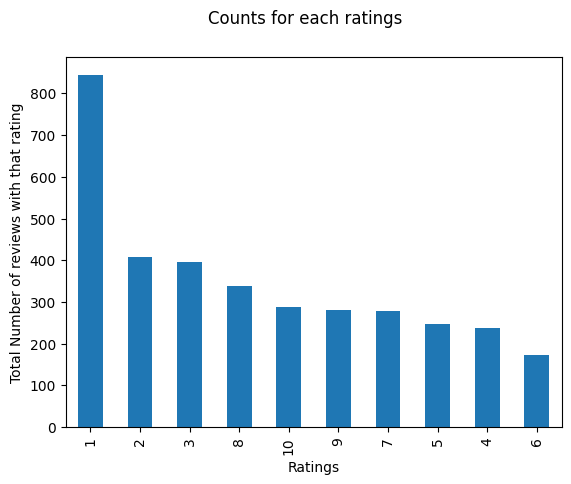

In [32]:
df["stars"].value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [33]:
df_ratings = pd.DataFrame(df['stars'].value_counts())
pct_values = (df_ratings.index / sum(df_ratings.index) * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [34]:
df_ratings = df_ratings.reset_index()

In [35]:
df_ratings.rename(columns={'count': 'total_counts'}, inplace=True)

In [36]:
df_ratings

stars  total_counts  pct_values
0      1           844        1.82
1      2           407        3.64
2      3           397        5.45
3      8           339       14.55
4     10           289       18.18
5      9           281       16.36
6      7           278       12.73
7      5           248        9.09
8      4           238        7.27
9      6           174       10.91

C:\Users\shreyash\AppData\Local\Temp\ipykernel_13256\875721534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings["stars"], y=df_ratings["total_counts"], data=df_ratings,
C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

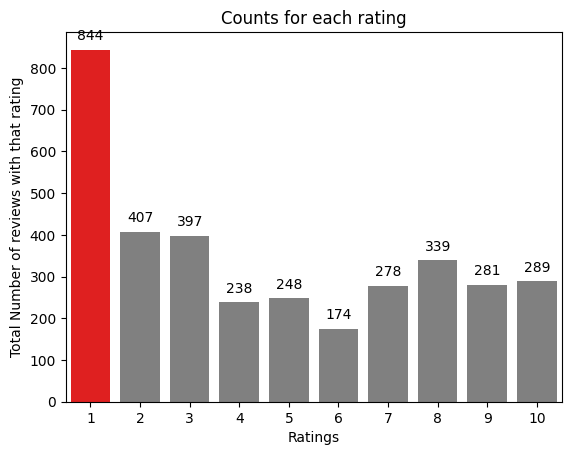

In [37]:
clrs = ['red' if x == max(df_ratings["total_counts"]) else 'grey' for x in df_ratings["total_counts"]]
ax = sns.barplot(x=df_ratings["stars"], y=df_ratings["total_counts"], data=df_ratings,
                 err_kws={'linewidth': 0}, palette=clrs)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")
plt.show()

In [38]:
print(f"{len(df['country'].unique())} unique countries")

69 unique countries


### Which country most review comes from?  

In [39]:
df_country_review = pd.DataFrame(df['country'].value_counts().head()).reset_index()

In [40]:
df_country_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  5 non-null      object
 1   count    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [41]:
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

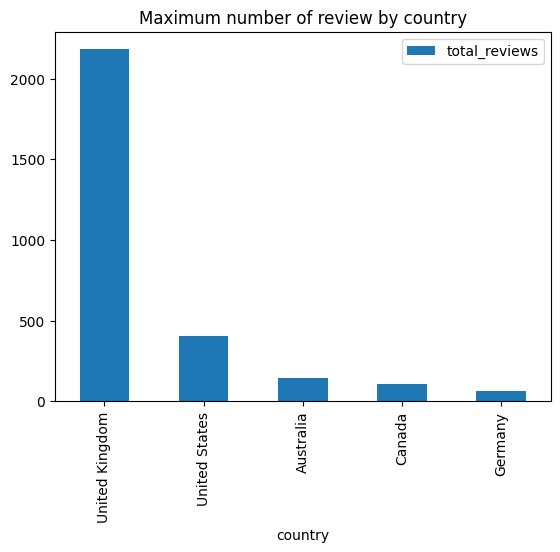

In [42]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

### Which country provided on average highest ratings?

In [43]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df.dropna(subset=['stars'], inplace=True)
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [44]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

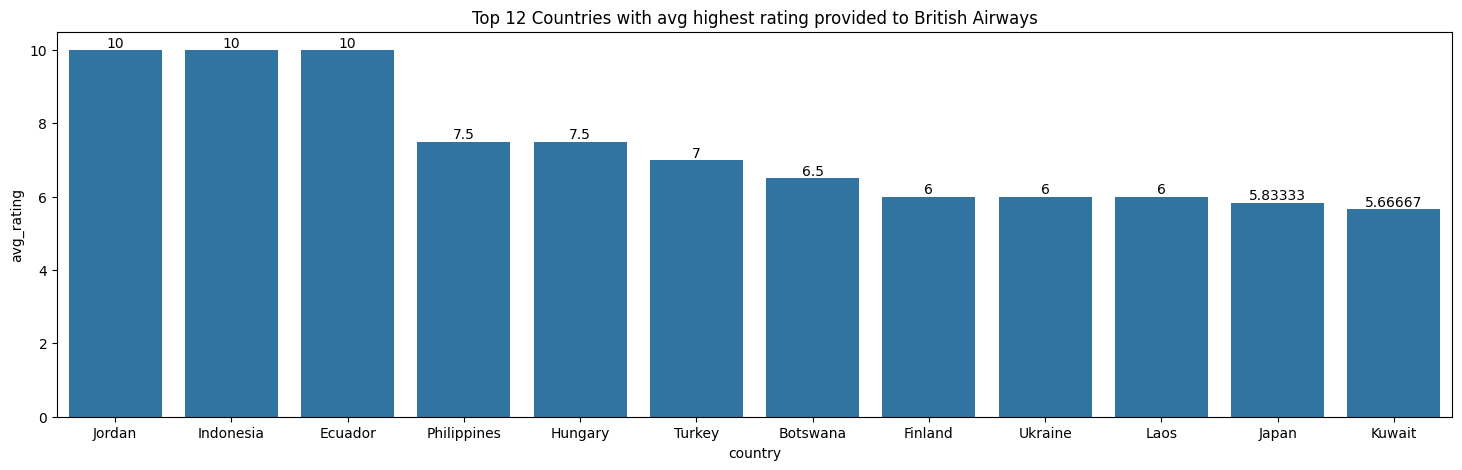

In [45]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

### Time Series Analysis

In [46]:
df["date"] = pd.to_datetime(df["date"])

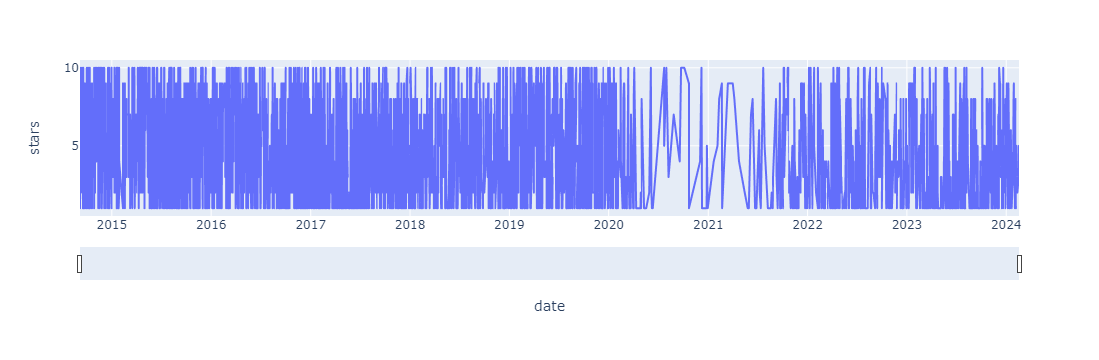

In [47]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

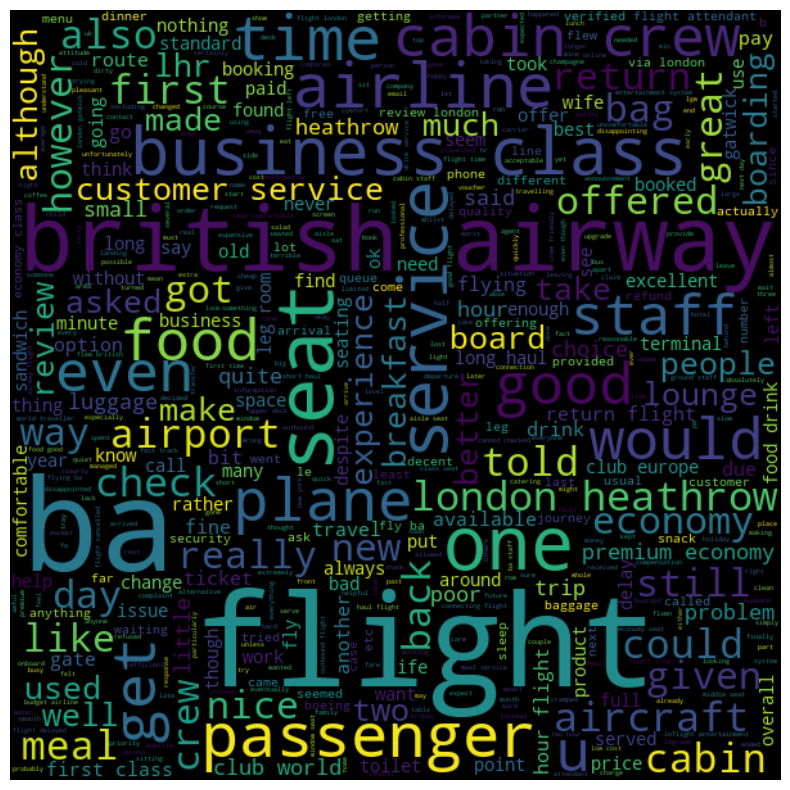

In [48]:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(height=600,width=600,max_font_size=100, 
                      max_words=500, stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

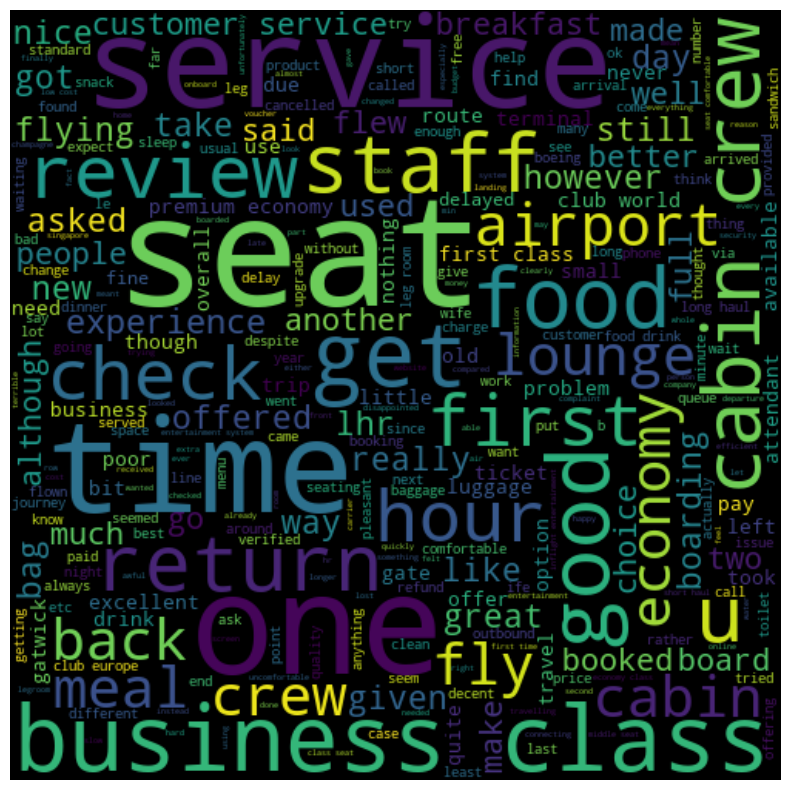

In [49]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["ba","flight", "british","airway", "airline","plane", 
                         "told","also","passenger" ,"london", "heathrow",
                         "aircraft", "could","even", "would"])
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, 
                      stopwords=custom_stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [50]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
words = reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london",
                                           "airway","british","airline",
                                           "heathrow","plane","lhr","review"])
new_words = [word for word in words if word not in stopwords]
nlp_words=FreqDist(new_words).most_common(20)
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

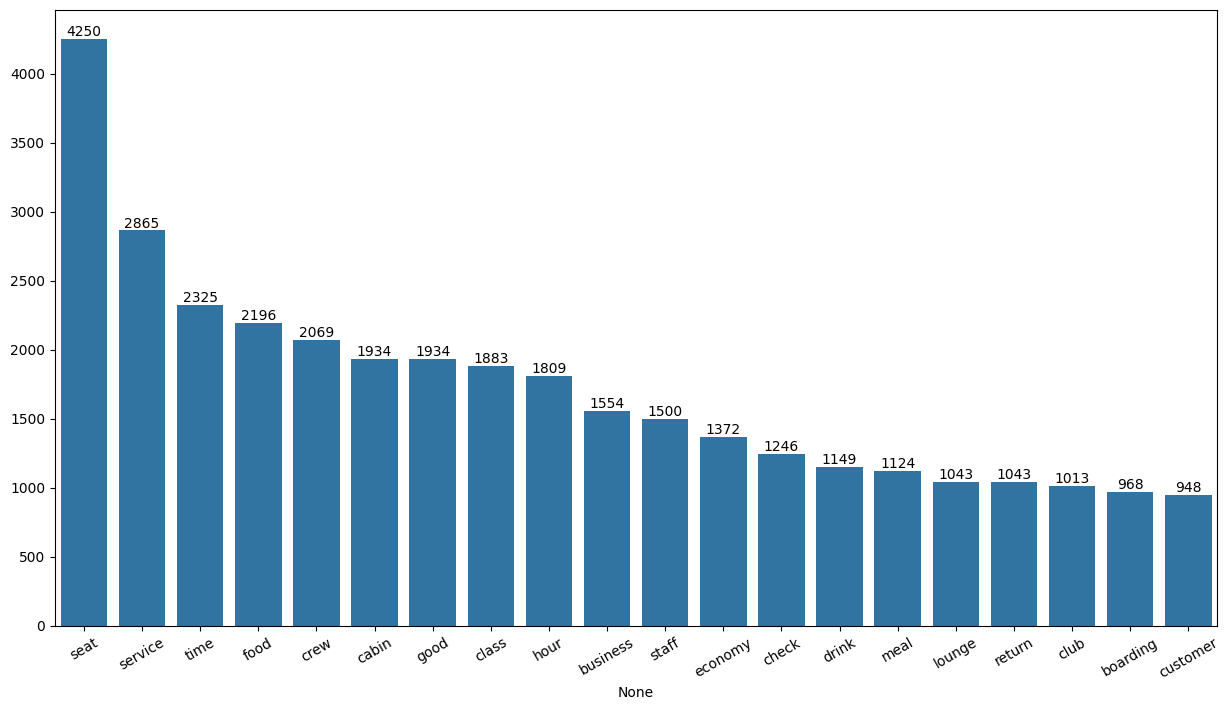

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience. 

## Word Frequency with N-gram

In [52]:
from nltk.corpus import stopwords
from nltk import FreqDist, ngrams
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shreyash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Axes: >

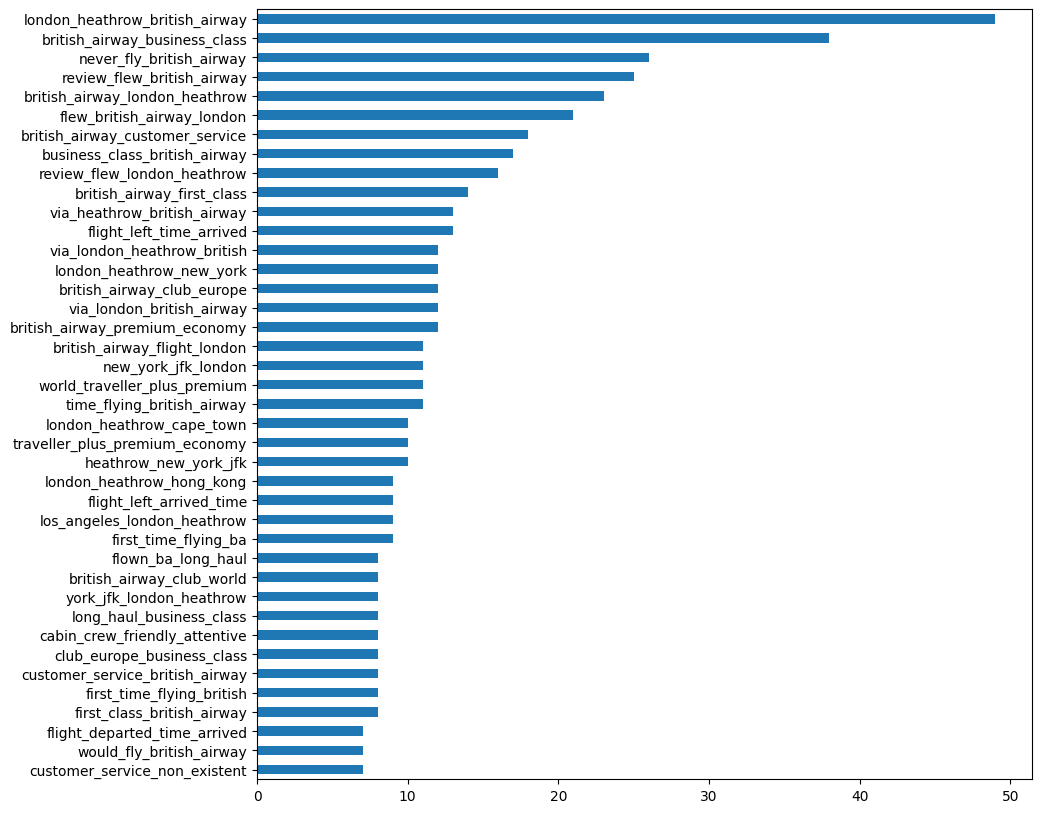

In [53]:
reviews = " ".join(df.corpus)
words = reviews.split(" ")
stop_words = set(stopwords.words('english'))
new_words = [word for word in words if word.lower() not in stop_words]
def get_freq_dist(new_words, number_of_ngrams):
    n_grams = ngrams(new_words, number_of_ngrams)
    ngram_fd = FreqDist(n_grams).most_common(40)
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    return ax
    
get_freq_dist(new_words, 4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [54]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

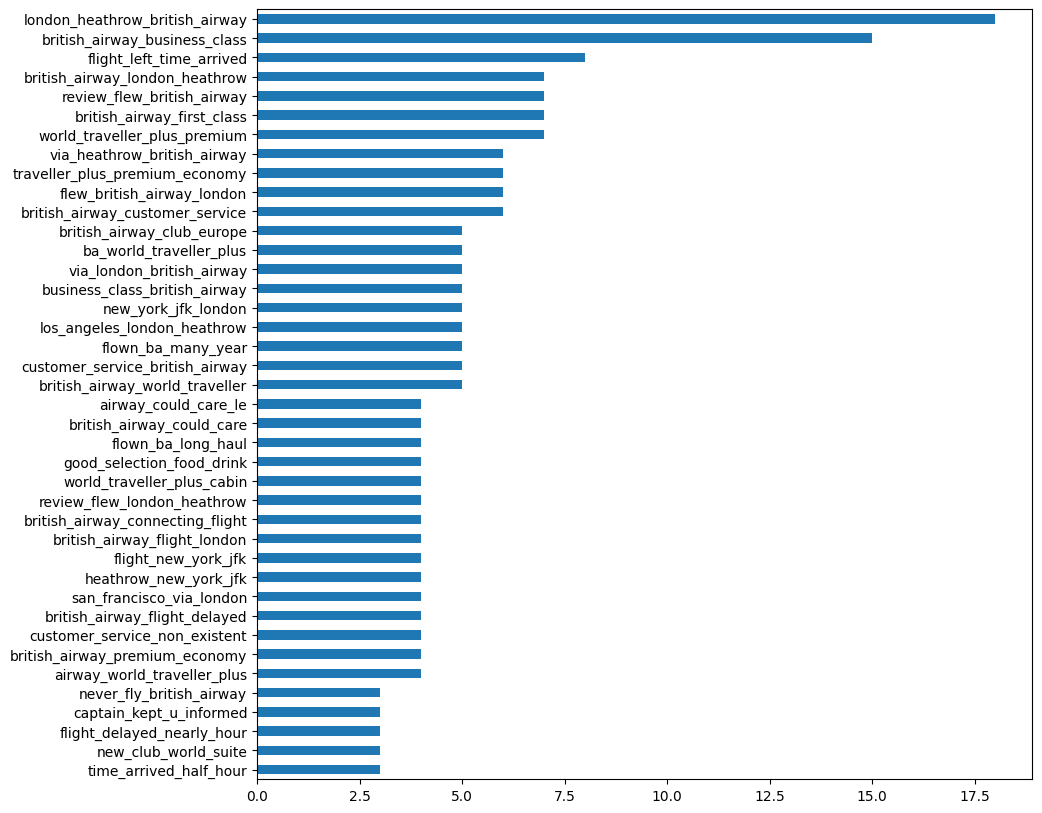

In [55]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")
stop_words = set(stopwords.words('english'))
new_words_7_10 = [word for word in words_7_10 if word.lower() not in stop_words]

get_freq_dist(new_words_7_10, 4)

<Axes: >

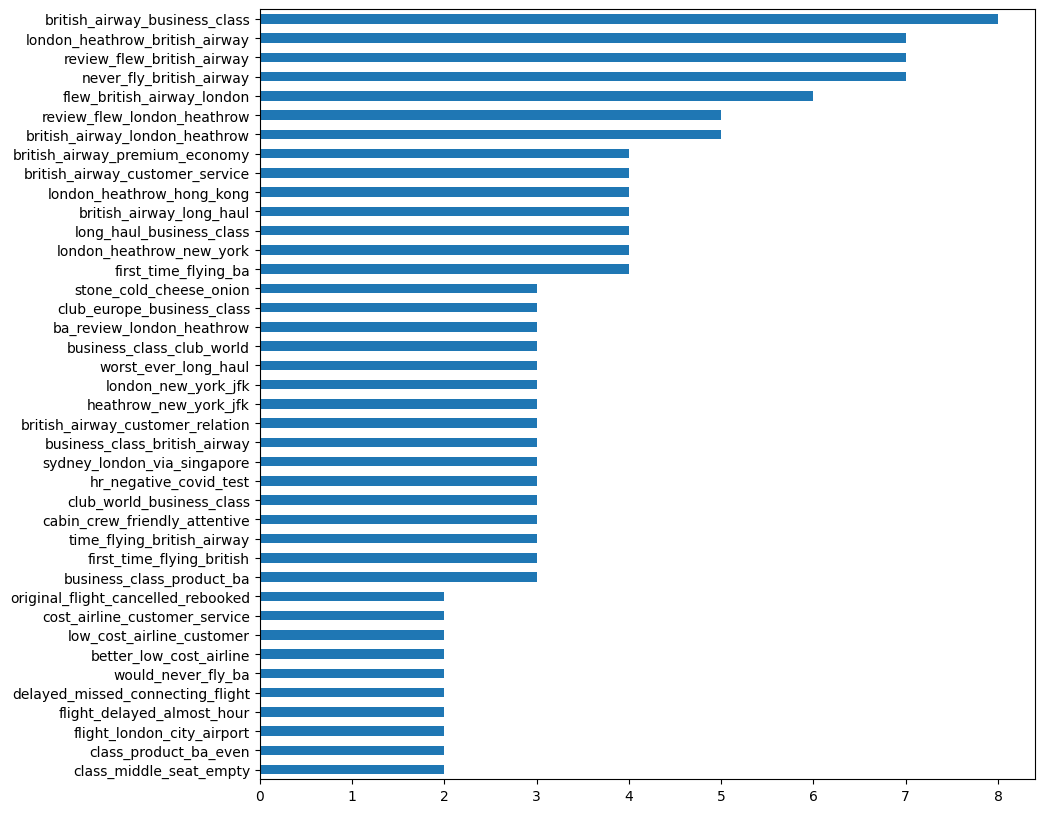

In [56]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")
stop_words = set(stopwords.words('english'))
new_words_4_6 = [word for word in words_4_6 if word.lower() not in stop_words]

get_freq_dist(new_words_4_6, 4)

<Axes: >

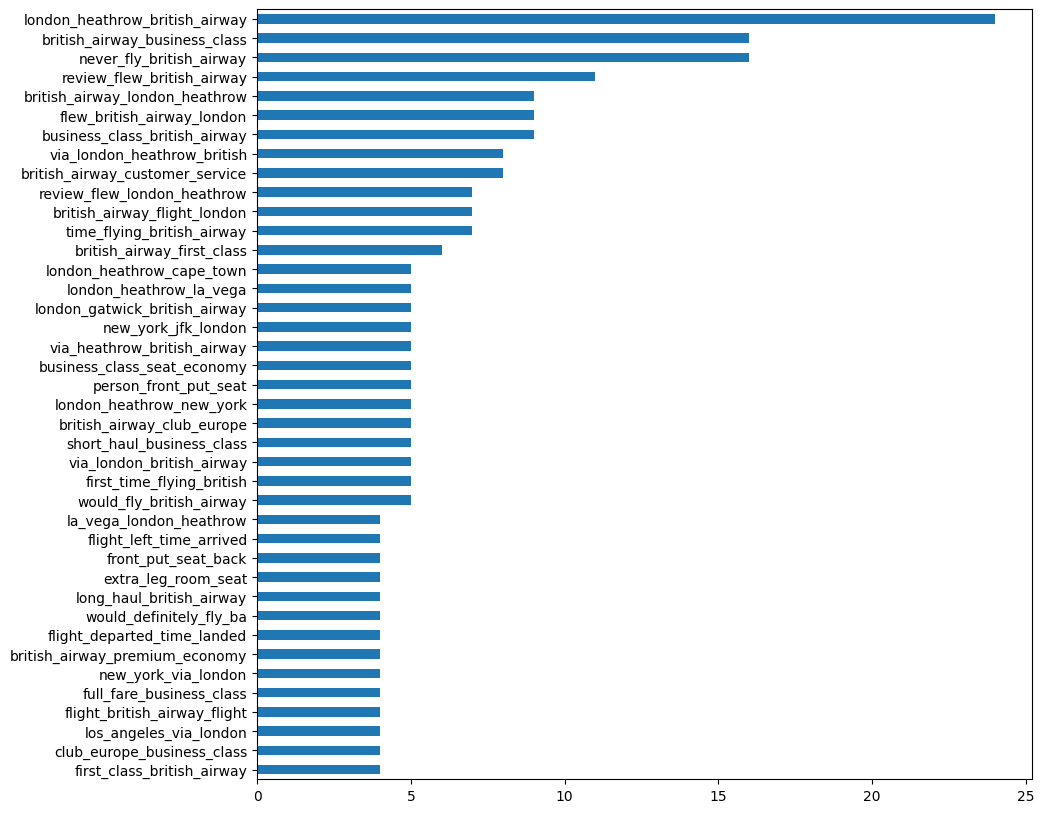

In [57]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")
stop_words = set(stopwords.words('english'))
new_words_1_3 = [word for word in words_1_3 if word.lower() not in stop_words]

get_freq_dist(new_words_1_3, 4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [58]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df.reset_index(drop=True, inplace=True)
df['polarity'] = 0
for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [59]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2383 number of reviews between -0.2 and 0.2 polarity score
1386 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2378 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [60]:
%%capture
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
vds = SentimentIntensityAnalyzer()
df['label'] = 0
for i in range(len(df.corpus)):   
    score = vds.polarity_scores(df.corpus[i])['compound']
    if score > 0.2:
        df['label'][i] = 1
    elif score < 0:
        df['label'][i] = -1
    else:
        df['label'][i] = 0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shreyash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
df["label"].value_counts()

label
 1    2206
-1    1168
 0     121
Name: count, dtype: int64

## Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [63]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 8
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)
topic_dict = {}
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [64]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0         diego             4.8         child            89.7           wir   
1      kalamata             4.2           bag            60.0            sa   
2     conducted             4.1         asked            53.6           und   
3          jack             3.0          meal            53.3     bucharest   
4          mini             2.5       british            43.7           fco   
5         covid             2.3        airway            43.3          miss   
6      expanded             2.1         water            42.5        fiasco   
7     underline             2.1        flight            41.9           war   
8      contrast             2.1         carry            39.8        panini   
9        redeem             2.1           kid            39.1         haben   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0             7.1          seat           214.4        flight          2667.0   
1             6.1        flight           199.6            ba          1543.0   
2             6.1        airway           178.7          hour           963.4   
3             5.9       british           176.4        airway           720.8   
4             5.1        london           102.7       british           717.9   
5             4.3          food            95.3        london           686.1   
6             4.2       airline            89.0      customer           686.1   
7             4.1         class            87.5          told           679.7   
8             4.1         cabin            83.6         would           639.3   
9             3.1       economy            81.6           get           636.6   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          1292.8          seat          3316.3            ba   
1         check           656.9        flight          3033.0       airline   
2      boarding           645.9            ba          2329.4       service   
3          time           611.7          food          1592.9       british   
4          good           562.7         class          1461.1        airway   
5          crew           561.1          crew          1326.1        flight   
6        lounge           498.6         cabin          1308.5         staff   
7       service           407.5       service          1272.2        london   
8         cabin           347.3          good          1193.5          food   
9      heathrow           342.4      business          1159.3      heathrow   

  Topic 7 weights  
0           521.9  
1           504.0  
2           479.0  
3           428.3  
4           415.0  
5           289.4  
6           263.2  
7           209.8  
8           180.2  
9           160.6


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

## Topic modeling with NMF

In [65]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03724724, 0.04029446],
       [0.07099335, 0.17176225],
       [0.03914429, 0.20327514],
       ...,
       [0.05864795, 0.00912532],
       [0.07394589, 0.06346238],
       [0.06878114, 0.16711134]])

In [66]:
topic_dict = {}
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [67]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            24.1        flight            21.8
1            ba            13.8            ba             7.4
2         class            10.9          hour             5.1
3      business             8.6          time             4.0
4          food             8.6        london             4.0
5       service             8.5        airway             3.9
6         cabin             8.2       british             3.8
7          good             7.8       service             3.6
8          crew             7.7         would             3.2
9       economy             6.7       airline             2.8

With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.